<a href="https://colab.research.google.com/github/J-Guzman32/BigDataTech/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


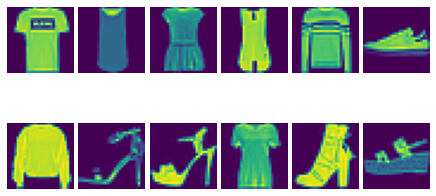

In [0]:
import numpy as np
np.random.seed(123)
import tensorflow as tf
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data() 

fig=plt.figure()
#plt.imshow(x_train[0])
for i in range(1,13):
    fig.add_subplot(2, 6, i)
    plt.imshow(train_images[i])
    plt.axis('off')
fig.tight_layout(pad=0.5)
plt.show()

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.4544 - accuracy: 0.8345
Epoch 2/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.2936 - accuracy: 0.8921
Epoch 3/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.2498 - accuracy: 0.9075
Epoch 4/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.2213 - accuracy: 0.9185
Epoch 5/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.2014 - accuracy: 0.9270
Epoch 6/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.1818 - accuracy: 0.9325
Epoch 7/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.1670 - accuracy: 0.9392
Epoch 8/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.1544 - accuracy: 0.9436
Epoch 9/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.1426 - accuracy: 0.9479
Epoch 10/10
60000/60000 [=====================

In [0]:
model.save('practice.h5')

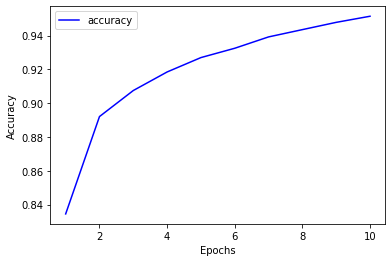

In [0]:
acc = history.history['accuracy']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b-',label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss:{}",test_loss)
print("Test accuracy:{}",test_acc)

10000/10000 [==============================] - 5s 513us/step
Test Loss:{} 0.28578826130330565
Test accuracy:{} 0.9146999716758728


170500096/170498071 [==============================] - 6s 0us/step


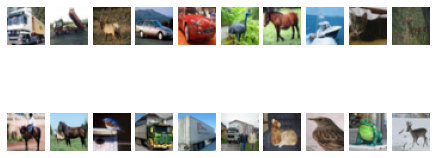

In [0]:
import numpy as np
np.random.seed(123)
import tensorflow as tf
from keras import layers
from keras import models
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

fig=plt.figure()
for i in range(1,21):
    fig.add_subplot(2, 10, i)
    plt.imshow(x_train[i])
    plt.axis('off')
fig.tight_layout(pad=0.5)
plt.show()


In [0]:
results_1=np.where(y_train<5)
x_train_1=x_train[results_1[0]]
y_train_1=y_train[results_1[0]]

results_2=np.where(y_train>=5)
x_train_2=x_train[results_2[0]]
y_train_2=y_train[results_2[0]]

results_3=np.where(y_test<5)
x_test_1=x_test[results_3[0]]
y_test_1=y_test[results_3[0]]

results_4=np.where(y_test>=5)
x_test_2=x_test[results_4[0]]
y_test_2=y_test[results_4[0]]

In [0]:
from keras.utils import to_categorical

x_train_1=x_train_1.astype('float32')/255
x_train_2=x_train_2.astype('float32')/255
x_test_1=x_test_1.astype('float32')/255
x_test_2=x_test_2.astype('float32')/255

# One-hot encode the labels
y_train_1 = tf.keras.utils.to_categorical(y_train_1[:,0], 10)
y_test_1 = tf.keras.utils.to_categorical(y_test_1[:,0], 10)
y_train_2 = tf.keras.utils.to_categorical(y_train_2[:,0],10)
y_test_2 = tf.keras.utils.to_categorical(y_test_2[:,0], 10)


In [0]:
feature_layers=[layers.Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)),
                layers.Conv2D(64,(3,3), activation='relu'),
                layers.MaxPooling2D((2,2)),
                layers.Dropout(.25),
                layers.Flatten(),]

classification_layers=[layers.Dense(128, activation='relu'),
                       layers.Dropout(.25),
                       layers.Dense(10, activation='softmax')]

model1 = models.Sequential(feature_layers+classification_layers)
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history1=model1.fit(x_train_1, y_train_1, epochs=20, batch_size=128, verbose=0)

In [0]:
acc1=history1.history['accuracy']
loss1=history1.history['loss']
epochs1=range(1,len(acc1)+1)

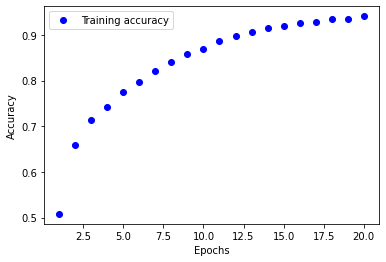

In [0]:
plt.clf()
plt.plot(epochs1,acc1,'bo',label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#P2.5

In [0]:

from keras import models
from keras import layers

for i in feature_layers:
  i.trainable=False

model_2=models.Sequential(feature_layers+classification_layers)
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

#P2.6

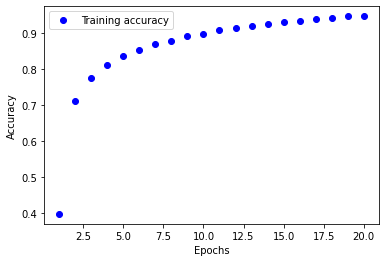

In [0]:
#p2.6. (10pt) Compile model_2, and train it on the last 5 categories of images with 20 epochs and batch size of 128. Draw the plot of the training accuracy w.r.t. the epoch number.

model_2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_2=model_2.fit(x_train_2, y_train_2, epochs=20, batch_size=128,verbose=0)

acc2=history_2.history['accuracy']
loss2=history_2.history['loss']
epochs_2=range(1,len(acc2)+1)

plt.clf()
plt.plot(epochs_2,acc2,'bo',label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()